In [1]:
import os
os.environ["PROJ_LIB"] = os.path.join(os.environ["CONDA_PREFIX"], "share", "proj")

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
from pyhdf.SD import SD, SDC

FILE_NAME = 'AIRS.2021.02.01.L3.RetStd_IR028.v7.0.4.0.G21066221513'
hdf = SD("hdf4/"+FILE_NAME+".hdf", SDC.READ)

# List available SDS datasets.
# print (hdf.datasets()["CH4_VMR_A"])

# Read dataset.
PRESSURE_INDEX = 5
PRESSURE_LIST = [1000, 925, 850, 700, 600, 500, 400, 300, 250, 200, 150, 100, 70, 50, 30, 20, 15, 10, 7, 5, 3, 2, 1.5, 1]
DATAFIELD_NAME='CH4_VMR_A'
data3D = hdf.select(DATAFIELD_NAME)
data = data3D[PRESSURE_INDEX,:,:]

# Read geolocation dataset.
lat = hdf.select('Latitude')
latitude = lat[:,:]
lon = hdf.select('Longitude')
longitude = lon[:,:]

C:\Users\admin\.conda\envs\airs\lib\site-packages\pyproj\__init__.py:91: UserWarning: Valid PROJ data directory not found. Either set the path using the environmental variable PROJ_LIB or with `pyproj.datadir.set_data_dir`.
  warnings.warn(str(err))


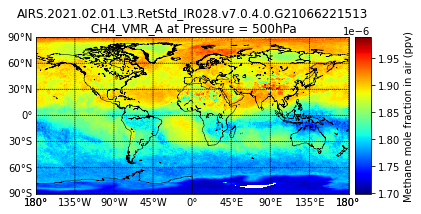

In [3]:
# Handle fill value.
attrs = data3D.attributes(full=1)
fillvalue=attrs["_FillValue"]

# fillvalue[0] is the attribute value.
fv = fillvalue[0]
data[data == fv] = np.nan
data = np.ma.masked_array(data, np.isnan(data))

# Draw an equidistant cylindrical projection using the low resolution
# coastline database.
m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=-90, urcrnrlat = 90,
            llcrnrlon=-180, urcrnrlon = 180)
m.drawcoastlines(linewidth=0.5)
m.drawparallels(np.arange(-90., 120., 30.), labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180., 181., 45.), labels=[0, 0, 0, 1])
x, y = m(longitude, latitude)
m.pcolormesh(x, y, data, cmap = "jet")


# cb = m.colorbar(format='%.1f')
cb = m.colorbar()
cb.set_label('Methane mole fraction in air (ppv)')

plt.title('{0}\n {1} at Pressure = {2}hPa'.format(FILE_NAME, DATAFIELD_NAME, PRESSURE_LIST[PRESSURE_INDEX]))
fig = plt.gcf()
# Show the plot window.
# plt.show()

# Save plot.
pngfile = "{0}.png".format(FILE_NAME)
# fig.savefig(pngfile, dpi = 300)
fig.savefig(pngfile)

In [15]:
data3D[:,:,:]

array([[[ 1.8076971e-06, -9.9990000e+03,  1.8808059e-06, ...,
          1.9771978e-06,  1.9725412e-06,  1.9695144e-06],
        [ 1.9297004e-06,  1.9546133e-06,  1.9466970e-06, ...,
          1.9490253e-06,  1.9653235e-06,  1.9613653e-06],
        [ 1.9541476e-06,  1.9497238e-06,  1.9525178e-06, ...,
          1.9599684e-06,  1.9576401e-06,  1.9564759e-06],
        ...,
        [-9.9990000e+03, -9.9990000e+03, -9.9990000e+03, ...,
         -9.9990000e+03, -9.9990000e+03, -9.9990000e+03],
        [-9.9990000e+03, -9.9990000e+03, -9.9990000e+03, ...,
         -9.9990000e+03, -9.9990000e+03, -9.9990000e+03],
        [-9.9990000e+03, -9.9990000e+03, -9.9990000e+03, ...,
         -9.9990000e+03, -9.9990000e+03, -9.9990000e+03]],

       [[ 1.8142164e-06, -9.9990000e+03,  1.8803403e-06, ...,
          1.9753352e-06,  1.9688159e-06,  1.9650906e-06],
        [ 1.9285362e-06,  1.9534491e-06,  1.9450672e-06, ...,
          1.9462314e-06,  1.9599684e-06,  1.9569416e-06],
        [ 1.9518193e-06, 

In [10]:
import numpy as np
import pandas as pd

pd.DataFrame(np.array(data3D[1,:,:]))

0            1            2            3            4    \
0       0.000002 -9999.000000     0.000002     0.000002     0.000002   
1       0.000002     0.000002     0.000002     0.000002     0.000002   
2       0.000002     0.000002     0.000002     0.000002     0.000002   
3       0.000002     0.000002     0.000002     0.000002     0.000002   
4       0.000002     0.000002     0.000002     0.000002     0.000002   
..           ...          ...          ...          ...          ...   
175 -9999.000000 -9999.000000 -9999.000000 -9999.000000 -9999.000000   
176 -9999.000000 -9999.000000 -9999.000000 -9999.000000 -9999.000000   
177 -9999.000000 -9999.000000 -9999.000000 -9999.000000 -9999.000000   
178 -9999.000000 -9999.000000 -9999.000000 -9999.000000 -9999.000000   
179 -9999.000000 -9999.000000 -9999.000000 -9999.000000 -9999.000000   

             5            6            7            8            9    ...  \
0       0.000002     0.000002     0.000002     0.000002     0.000002  ...   
1       0.000002     0.000002     0.000002     0.000002     0.000002  ...   
2       0.000002     0.000002     0.000002     0.000002     0.000002  ...   
3       0.000002     0.000002     0.000002     0.000002     0.000002  ...   
4       0.000002     0.000002     0.000002     0.000002     0.000002  ...   
..           ...          ...          ...          ...          ...  ...   
175 -9999.000000 -9999.000000 -9999.000000 -9999.000000 -9999.000000  ...   
176 -9999.000000 -9999.000000 -9999.000000 -9999.000000 -9999.000000  ...   
177 -9999.000000 -9999.000000 -9999.000000 -9999.000000 -9999.000000  ...   
178 -9999.000000 -9999.000000 -9999.000000 -9999.000000 -9999.000000  ...   
179 -9999.000000 -9999.000000 -9999.000000 -9999.000000 -9999.000000  ...   

             350          351          352          353          354  \
0       0.000002     0.000002     0.000002     0.000002     0.000002   
1       0.000002     0.000002     0.000002     0.000002     0.000002   
2       0.000002     0.000002     0.000002     0.000002     0.000002   
3       0.000002     0.000002     0.000002     0.000002     0.000002   
4       0.000002     0.000002     0.000002     0.000002     0.000002   
..           ...          ...          ...          ...          ...   
175 -9999.000000 -9999.000000 -9999.000000 -9999.000000 -9999.000000   
176 -9999.000000 -9999.000000 -9999.000000 -9999.000000 -9999.000000   
177 -9999.000000 -9999.000000 -9999.000000 -9999.000000 -9999.000000   
178 -9999.000000 -9999.000000 -9999.000000 -9999.000000 -9999.000000   
179 -9999.000000 -9999.000000 -9999.000000 -9999.000000 -9999.000000   

             355          356          357          358          359  
0       0.000002     0.000002     0.000002     0.000002     0.000002  
1       0.000002     0.000002     0.000002     0.000002     0.000002  
2       0.000002     0.000002     0.000002     0.000002     0.000002  
3       0.000002     0.000002     0.000002     0.000002     0.000002  
4       0.000002     0.000002     0.000002     0.000002     0.000002  
..           ...          ...          ...          ...          ...  
175 -9999.000000 -9999.000000 -9999.000000 -9999.000000 -9999.000000  
176 -9999.000000 -9999.000000 -9999.000000 -9999.000000 -9999.000000  
177 -9999.000000 -9999.000000 -9999.000000 -9999.000000 -9999.000000  
178 -9999.000000 -9999.000000 -9999.000000 -9999.000000 -9999.000000  
179 -9999.000000 -9999.000000 -9999.000000 -9999.000000 -9999.000000  

[180 rows x 360 columns]

In [11]:
pd.DataFrame(data)

0         1         2         3         4         5         6    \
0    0.000002       NaN  0.000002  0.000002  0.000002  0.000002  0.000002   
1    0.000002  0.000002  0.000002  0.000002  0.000002  0.000002  0.000002   
2    0.000002  0.000002  0.000002  0.000002  0.000002  0.000002  0.000002   
3    0.000002  0.000002  0.000002  0.000002  0.000002  0.000002  0.000002   
4    0.000002  0.000002  0.000002  0.000002  0.000002  0.000002  0.000002   
..        ...       ...       ...       ...       ...       ...       ...   
175       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
176       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
177       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
178       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
179       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

          7         8         9    ...       350       351       352  \
0    0.000002  0.000002  0.000002  ...  0.000002  0.000002  0.000002   
1    0.000002  0.000002  0.000002  ...  0.000002  0.000002  0.000002   
2    0.000002  0.000002  0.000002  ...  0.000002  0.000002  0.000002   
3    0.000002  0.000002  0.000002  ...  0.000002  0.000002  0.000002   
4    0.000002  0.000002  0.000002  ...  0.000002  0.000002  0.000002   
..        ...       ...       ...  ...       ...       ...       ...   
175       NaN       NaN       NaN  ...       NaN       NaN       NaN   
176       NaN       NaN       NaN  ...       NaN       NaN       NaN   
177       NaN       NaN       NaN  ...       NaN       NaN       NaN   
178       NaN       NaN       NaN  ...       NaN       NaN       NaN   
179       NaN       NaN       NaN  ...       NaN       NaN       NaN   

          353       354       355       356       357       358       359  
0    0.000002  0.000002  0.000002  0.000002  0.000002  0.000002  0.000002  
1    0.000002  0.000002  0.000002  0.000002  0.000002  0.000002  0.000002  
2    0.000002  0.000002  0.000002  0.000002  0.000002  0.000002  0.000002  
3    0.000002  0.000002  0.000002  0.000002  0.000002  0.000002  0.000002  
4    0.000002  0.000002  0.000002  0.000002  0.000002  0.000002  0.000002  
..        ...       ...       ...       ...       ...       ...       ...  
175       NaN       NaN       NaN       NaN       NaN       NaN       NaN  
176       NaN       NaN       NaN       NaN       NaN       NaN       NaN  
177       NaN       NaN       NaN       NaN       NaN       NaN       NaN  
178       NaN       NaN       NaN       NaN       NaN       NaN       NaN  
179       NaN       NaN       NaN       NaN       NaN       NaN       NaN  

[180 rows x 360 columns]

In [12]:
pd.DataFrame(latitude)

0     1     2     3     4     5     6     7     8     9    ...   350  \
0    89.5  89.5  89.5  89.5  89.5  89.5  89.5  89.5  89.5  89.5  ...  89.5   
1    88.5  88.5  88.5  88.5  88.5  88.5  88.5  88.5  88.5  88.5  ...  88.5   
2    87.5  87.5  87.5  87.5  87.5  87.5  87.5  87.5  87.5  87.5  ...  87.5   
3    86.5  86.5  86.5  86.5  86.5  86.5  86.5  86.5  86.5  86.5  ...  86.5   
4    85.5  85.5  85.5  85.5  85.5  85.5  85.5  85.5  85.5  85.5  ...  85.5   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
175 -85.5 -85.5 -85.5 -85.5 -85.5 -85.5 -85.5 -85.5 -85.5 -85.5  ... -85.5   
176 -86.5 -86.5 -86.5 -86.5 -86.5 -86.5 -86.5 -86.5 -86.5 -86.5  ... -86.5   
177 -87.5 -87.5 -87.5 -87.5 -87.5 -87.5 -87.5 -87.5 -87.5 -87.5  ... -87.5   
178 -88.5 -88.5 -88.5 -88.5 -88.5 -88.5 -88.5 -88.5 -88.5 -88.5  ... -88.5   
179 -89.5 -89.5 -89.5 -89.5 -89.5 -89.5 -89.5 -89.5 -89.5 -89.5  ... -89.5   

      351   352   353   354   355   356   357   358   359  
0    89.5  89.5  89.5  89.5  89.5  89.5  89.5  89.5  89.5  
1    88.5  88.5  88.5  88.5  88.5  88.5  88.5  88.5  88.5  
2    87.5  87.5  87.5  87.5  87.5  87.5  87.5  87.5  87.5  
3    86.5  86.5  86.5  86.5  86.5  86.5  86.5  86.5  86.5  
4    85.5  85.5  85.5  85.5  85.5  85.5  85.5  85.5  85.5  
..    ...   ...   ...   ...   ...   ...   ...   ...   ...  
175 -85.5 -85.5 -85.5 -85.5 -85.5 -85.5 -85.5 -85.5 -85.5  
176 -86.5 -86.5 -86.5 -86.5 -86.5 -86.5 -86.5 -86.5 -86.5  
177 -87.5 -87.5 -87.5 -87.5 -87.5 -87.5 -87.5 -87.5 -87.5  
178 -88.5 -88.5 -88.5 -88.5 -88.5 -88.5 -88.5 -88.5 -88.5  
179 -89.5 -89.5 -89.5 -89.5 -89.5 -89.5 -89.5 -89.5 -89.5  

[180 rows x 360 columns]